<div style="background-color:green; color:white; padding:15px 0; text-align:center; font-size:24px;">
  Data Cleaning
</div>


In [1]:
# importing required libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the csv file and store it as dataframe
df = pd.read_csv("weatherAUS.csv")

In [3]:
# it displays the first 5 data of the dataframe
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
# checking whether any null values present in the dataframe 
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [5]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

# Checking skewness to choose the best values(mean/median) to fill in the null values.

In [6]:
columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
      'Sunshine', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']
skew_value = df[columns].skew()
print(f"Skewness: {skew_value}")

Skewness: MinTemp          0.021188
MaxTemp          0.220839
Rainfall         9.836225
Evaporation      3.761286
Sunshine        -0.496480
WindGustSpeed    0.874879
WindSpeed9am     0.777630
WindSpeed3pm     0.628215
Humidity9am     -0.483969
Humidity3pm      0.033614
Pressure9am     -0.095524
Pressure3pm     -0.045621
Cloud9am        -0.229082
Cloud3pm        -0.226384
Temp9am          0.088540
Temp3pm          0.237960
dtype: float64


# Skewness
Skewness is a measure of how asymmetrical or uneven the data is. It shows if more data is on the left or right of the average.

- Skewness ≈ 0 → Symmetrical or data is balanced (use mean)

- Skewness > 1 or < -1 → Highly skewed (use median)

- Between -1 and 1 → Moderately skewed (mean can be okay, but median is safer)

According to the skew value, it is then decided to fill the columns' null values with either median or mean values.

For string values, we are using mode.

### Filling the respective columns with mean, median, mode 

In [7]:
median_cols = ['MaxTemp','Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm' , 'Cloud9am' , 'Cloud3pm', 'Temp3pm']
mean_cols = ['MinTemp', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm','Temp9am']
mode_cols = ['WindGustDir', 'WindDir9am','WindDir3pm', 'RainToday', 'RainTomorrow']

In [8]:
def fill_missing_values(df, median_cols=[], mean_cols=[], mode_cols=[]):
    # Fill with median
    for col in median_cols:
        if col in df.columns:
            df[col] = df[col].fillna(df[col].median())

    # Fill with mean
    for col in mean_cols:
        if col in df.columns:
            df[col] = df[col].fillna(df[col].mean())

    # Fill with mode
    for col in mode_cols:
        if col in df.columns:
            df[col] = df[col].fillna(df[col].mode()[0])

    return df


In [9]:
## function calling
df = fill_missing_values(df, median_cols, mean_cols, mode_cols)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,4.8,8.4,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,4.8,8.4,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,4.8,8.4,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,4.8,8.4,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [10]:
df.isnull().sum() # all null values are filled 

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [11]:
df.duplicated().sum() # checking for the presence of duplicates

0

In [12]:
df.to_csv("cleaned_data.csv") ## final cleaned data is exported

In [13]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,4.8,8.4,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,4.8,8.4,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,4.8,8.4,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,4.8,8.4,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [14]:
df['Location'].nunique()

49

<div style="background-color:green; color:white; padding:15px 0; text-align:center; font-size:24px;">
  Data Preprocessing and Feature Reduction
</div>


Data Preprocessing is the process of transforming and organizing the data into a structured format suitable for analysis and machine learning. It includes tasks such as encoding, feature scaling and dimensionality reduction to enhance the performance and efficacy of models.

### Target Encoding

It transforms the categorical column Location based on its relationship with the target variable RainTomorrow.
Better than OneHot when there are many categories and a need to preserve target signal.

In [15]:
# Target Encoding
import category_encoders as ce

encoder = ce.TargetEncoder(cols=['Location'])
df = encoder.fit_transform(df, df['RainTomorrow'])
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,0.203289,13.4,22.9,0.6,4.8,8.4,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No
1,2008-12-02,0.203289,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No
2,2008-12-03,0.203289,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No
3,2008-12-04,0.203289,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No
4,2008-12-05,0.203289,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,0.073511,2.8,23.4,0.0,4.8,8.4,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,No,No
145456,2017-06-22,0.073511,3.6,25.3,0.0,4.8,8.4,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,No,No
145457,2017-06-23,0.073511,5.4,26.9,0.0,4.8,8.4,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,No,No
145458,2017-06-24,0.073511,7.8,27.0,0.0,4.8,8.4,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


### Encoding other string values to numerical values using dummy variables

In [16]:
df_encoded = pd.get_dummies(df[['WindGustDir', 'WindDir9am', 'WindDir3pm']]).astype(int)

In [17]:
df_encoded

,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145456,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145457,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
145458,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df_encoded.columns

Index(['WindGustDir_E', 'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N',
       'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW',
       'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE',
       'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW',
       'WindGustDir_WSW', 'WindDir9am_E', 'WindDir9am_ENE', 'WindDir9am_ESE',
       'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW',
       'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE', 'WindDir9am_SSE',
       'WindDir9am_SSW', 'WindDir9am_SW', 'WindDir9am_W', 'WindDir9am_WNW',
       'WindDir9am_WSW', 'WindDir3pm_E', 'WindDir3pm_ENE', 'WindDir3pm_ESE',
       'WindDir3pm_N', 'WindDir3pm_NE', 'WindDir3pm_NNE', 'WindDir3pm_NNW',
       'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE',
       'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W', 'WindDir3pm_WNW',
       'WindDir3pm_WSW'],
      dtype='object')

### Label Encoding

Encoding 'Yes' to 1 and 'No' to 0.

In [19]:
df['RainToday'] = df['RainToday'].map({'No': 0, 'Yes': 1})
df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1})

In [20]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,0.203289,13.4,22.9,0.6,4.8,8.4,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
1,2008-12-02,0.203289,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2,2008-12-03,0.203289,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0
3,2008-12-04,0.203289,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0
4,2008-12-05,0.203289,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


In [21]:
#Merging the df with the encoded df
merged_df = pd.concat([df,df_encoded], axis = 'columns')
merged_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,2008-12-01,0.203289,13.4,22.9,0.6,4.8,8.4,W,44.0,W,...,0,0,0,0,0,0,0,0,1,0
1,2008-12-02,0.203289,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,...,0,0,0,0,0,0,0,0,0,1
2,2008-12-03,0.203289,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,...,0,0,0,0,0,0,0,0,0,1
3,2008-12-04,0.203289,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,...,0,0,0,0,0,0,0,0,0,0
4,2008-12-05,0.203289,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,0.073511,2.8,23.4,0.0,4.8,8.4,E,31.0,SE,...,0,0,0,0,0,0,0,0,0,0
145456,2017-06-22,0.073511,3.6,25.3,0.0,4.8,8.4,NNW,22.0,SE,...,0,0,0,0,0,0,0,0,0,0
145457,2017-06-23,0.073511,5.4,26.9,0.0,4.8,8.4,N,37.0,SE,...,0,0,0,0,0,0,0,0,1,0
145458,2017-06-24,0.073511,7.8,27.0,0.0,4.8,8.4,SE,28.0,SSE,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# As the columns are now encoded the former columns shall be dropped as keeping them would be redundanct and might cause errors in modeling. 
# Also dropping the columns that doesn't have much affect in training.
merged_df = merged_df.drop(df[['Date','Location','WindGustDir','WindDir9am','WindDir3pm' ]], axis = 'columns')
merged_df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,4.8,8.4,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,4.8,8.4,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,4.8,8.4,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,4.8,8.4,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,4.8,8.4,41.0,7.0,20.0,82.0,33.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,4.8,8.4,31.0,13.0,11.0,51.0,24.0,...,0,0,0,0,0,0,0,0,0,0
145456,3.6,25.3,0.0,4.8,8.4,22.0,13.0,9.0,56.0,21.0,...,0,0,0,0,0,0,0,0,0,0
145457,5.4,26.9,0.0,4.8,8.4,37.0,9.0,9.0,53.0,24.0,...,0,0,0,0,0,0,0,0,1,0
145458,7.8,27.0,0.0,4.8,8.4,28.0,13.0,7.0,51.0,24.0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# Finding the correlation matrix to find the dependencies of two features
corr_matrix = merged_df.corr()

In [24]:
# Visualizing the Matrix
#import seaborn as sns
#plt.figure(figsize=(100,95))
#sns.heatmap(corr_matrix, annot = True, cmap= 'coolwarm')

In [25]:
merged_df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'WindGustDir_E',
       'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE',
       'WindGustDir_NNE', 'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S',
       'WindGustDir_SE', 'WindGustDir_SSE', 'WindGustDir_SSW',
       'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW', 'WindGustDir_WSW',
       'WindDir9am_E', 'WindDir9am_ENE', 'WindDir9am_ESE', 'WindDir9am_N',
       'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW', 'WindDir9am_NW',
       'WindDir9am_S', 'WindDir9am_SE', 'WindDir9am_SSE', 'WindDir9am_SSW',
       'WindDir9am_SW', 'WindDir9am_W', 'WindDir9am_WNW', 'WindDir9am_WSW',
       'WindDir3pm_E', 'WindDir3pm_ENE', 'WindDir3pm_ESE', 'WindDir3pm_N',
       'WindDir3pm_NE', 'Win

In [26]:
# It is found that the wind direction has less correlation so they are dropped
columns_to_drop = [
    'WindGustDir_E','WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N',
    'WindGustDir_NE','WindGustDir_NNE', 'WindGustDir_NNW', 'WindGustDir_NW',
    'WindGustDir_S','WindGustDir_SE', 'WindGustDir_SSE', 'WindGustDir_SSW',
    'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW', 'WindGustDir_WSW',
    
    'WindDir9am_E', 'WindDir9am_ENE', 'WindDir9am_ESE', 'WindDir9am_N',
    'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW', 'WindDir9am_NW',
    'WindDir9am_S', 'WindDir9am_SE', 'WindDir9am_SSE', 'WindDir9am_SSW',
    'WindDir9am_SW', 'WindDir9am_W', 'WindDir9am_WNW', 'WindDir9am_WSW',
    
    'WindDir3pm_E', 'WindDir3pm_ENE', 'WindDir3pm_ESE', 'WindDir3pm_N',
    'WindDir3pm_NE', 'WindDir3pm_NNE', 'WindDir3pm_NNW', 'WindDir3pm_NW',
    'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE', 'WindDir3pm_SSW',
    'WindDir3pm_SW', 'WindDir3pm_W', 'WindDir3pm_WNW', 'WindDir3pm_WSW'
]

final_df = merged_df.drop(columns=columns_to_drop, axis=1)


In [27]:
final_df.head(20)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,4.8,8.4,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
1,7.4,25.1,0.0,4.8,8.4,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2,12.9,25.7,0.0,4.8,8.4,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0
3,9.2,28.0,0.0,4.8,8.4,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0
4,17.5,32.3,1.0,4.8,8.4,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
5,14.6,29.7,0.2,4.8,8.4,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,5.0,5.0,20.6,28.9,0,0
6,14.3,25.0,0.0,4.8,8.4,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,5.0,18.1,24.6,0,0
7,7.7,26.7,0.0,4.8,8.4,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,5.0,5.0,16.3,25.5,0,0
8,9.7,31.9,0.0,4.8,8.4,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,5.0,5.0,18.3,30.2,0,1
9,13.1,30.1,1.4,4.8,8.4,28.0,15.0,11.0,58.0,27.0,1007.0,1005.7,5.0,5.0,20.1,28.2,1,0


In [28]:
final_df.shape

(145460, 18)

<div style="background-color:green; color:white; padding:15px 0; text-align:center; font-size:24px;">
  Train-Test Split
</div>


### The data is split into training and testing set

- Training set → Used to train the model

- Testing set → Used to evaluate how well the model performs on unseen data



In this case, training data is 70% and testing data is 30%

In [29]:
from sklearn.model_selection import train_test_split
X_full = final_df.drop('RainTomorrow', axis=1)
y = final_df['RainTomorrow']
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y, test_size=0.3, random_state=42)

<div style="background-color:green; color:white; padding:15px 0; text-align:center; font-size:24px;">
  Feature Selection
</div>


Feature selection is choosing the most important features that actually helps the model make better predictions — and removing the rest.

Checking different techniques like correlation matrix and feature inportance to select the best features.

In [30]:
final_df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
MinTemp,1.000000,0.733344,0.102297,0.364794,0.032616,0.171937,0.173530,0.173073,-0.230970,0.005995,-0.423584,-0.433147,0.043094,0.000188,0.897692,0.698564,0.054559,0.082173
MaxTemp,0.733344,1.000000,-0.073563,0.447289,0.315487,0.066451,0.014389,0.049507,-0.497960,-0.498792,-0.308274,-0.396583,-0.232311,-0.218368,0.879114,0.968332,-0.225192,-0.156523
Rainfall,0.102297,-0.073563,1.000000,-0.041371,-0.168777,0.125109,0.084586,0.055688,0.220704,0.247926,-0.158819,-0.119402,0.164202,0.139380,0.010896,-0.077466,0.502807,0.233877
Evaporation,0.364794,0.447289,-0.041371,1.000000,0.279210,0.149942,0.148681,0.101264,-0.384208,-0.293690,-0.213741,-0.233685,-0.169494,-0.160652,0.425673,0.434014,-0.138946,-0.088709
Sunshine,0.032616,0.315487,-0.168777,0.279210,1.000000,-0.031229,-0.012197,0.023176,-0.329936,-0.430351,0.035856,-0.010509,-0.505488,-0.526045,0.191347,0.331676,-0.234048,-0.319412
WindGustSpeed,0.171937,0.066451,0.125109,0.149942,-0.031229,1.000000,0.578744,0.657975,-0.208887,-0.026822,-0.425879,-0.384208,0.046261,0.072894,0.145810,0.032375,0.145332,0.220144
WindSpeed9am,0.173530,0.014389,0.084586,0.148681,-0.012197,0.578744,1.000000,0.512279,-0.268219,-0.031005,-0.215334,-0.165383,0.006593,0.028376,0.127560,0.004806,0.098901,0.086746
WindSpeed3pm,0.173073,0.049507,0.055688,0.101264,0.023176,0.657975,0.512279,1.000000,-0.143312,0.016284,-0.277581,-0.239618,0.031498,0.010460,0.161055,0.027529,0.077084,0.084214
Humidity9am,-0.230970,-0.497960,0.220704,-0.384208,-0.329936,-0.208887,-0.268219,-0.143312,1.000000,0.659072,0.131503,0.176009,0.355700,0.278008,-0.469641,-0.490939,0.347034,0.251470
Humidity3pm,0.005995,-0.498792,0.247926,-0.293690,-0.430351,-0.026822,-0.031005,0.016284,0.659072,1.000000,-0.025848,0.048695,0.396986,0.403395,-0.216964,-0.555559,0.367937,0.433179


In [31]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_full, y_train_full)

importances = model.feature_importances_
feature_names = X_train_full.columns

# Display importance
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.4f}")

MinTemp: 0.0580
MaxTemp: 0.0573
Rainfall: 0.0618
Evaporation: 0.0323
Sunshine: 0.0586
WindGustSpeed: 0.0634
WindSpeed9am: 0.0401
WindSpeed3pm: 0.0418
Humidity9am: 0.0648
Humidity3pm: 0.1855
Pressure9am: 0.0649
Pressure3pm: 0.0728
Cloud9am: 0.0222
Cloud3pm: 0.0357
Temp9am: 0.0559
Temp3pm: 0.0571
RainToday: 0.0278


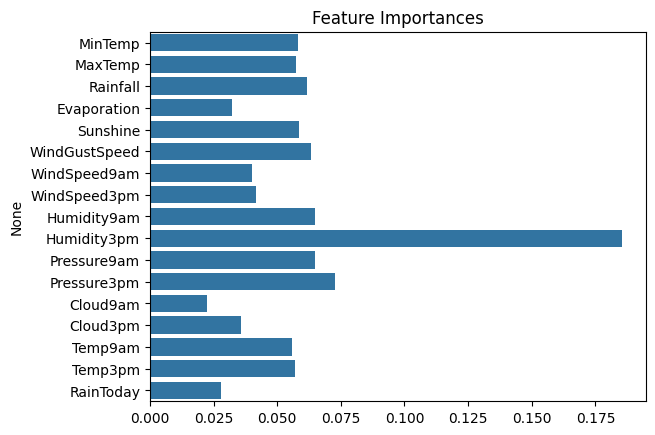

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importances")
plt.show()

## Feature Importance
This value determines how much one feature is important for predicting.

From comparing the values, the selected features are finalized.

In [33]:
selected_features = ['Rainfall', 'Humidity3pm', 'Humidity9am', 'Sunshine','MinTemp', 'Pressure9am', 'Pressure3pm', 'WindGustSpeed']

In [34]:
# Selected features are the inputs
X = ['Rainfall', 'Humidity3pm', 'Humidity9am', 'Sunshine','MinTemp', 'Pressure9am', 'Pressure3pm', 'WindGustSpeed']

In [35]:
# This is the target variable for which we will be predicting the outcome
y = final_df['RainTomorrow']

In [36]:
# Again splitting the data, for the final selected features
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.2, random_state=42)

<div style="background-color:green; color:white; padding:15px 0; text-align:center; font-size:24px;">
  Model Training
</div>


# Training Different Models for Prediction

### Need of StandardScaler
It is used to standardize the features.

Imagine you're comparing height in cm (like 150–200) and temperature in °C (like 20–30). Some machine learning models give more importance to bigger numbers. That’s unfair — all features should be treated equally.

So we standardize them to make the numbers easier to compare.

## 1.Logistic Regression Model

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

log_reg = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

log_reg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [38]:
log_reg.score(X_test,y_test)

0.8425340299738759

## 2.Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(
    n_estimators=100,         # Fewer trees may help
    max_depth=10,             # Limit the depth of trees
    min_samples_split=10,     # Minimum samples to split an internal node
    min_samples_leaf=4,       # Minimum samples at a leaf node
    max_features='sqrt',      # Reduces randomness in splits
    random_state=42
)

In [40]:
RF.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [41]:
train_accuracy = RF.score(X_train, y_train)
train_accuracy

0.8644386772996012

In [42]:
RF.score(X_test, y_test)

0.8437714835693662

In [43]:
y_pred_RF = RF.predict(X_test)
y_pred_RF

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

## 3.KNN Model

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune k later
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [47]:
y_pred_KNN = knn.predict(X_test_scaled)

In [48]:
train_accuracy = knn.score(X_train_scaled, y_train)
train_accuracy

0.879245153306751

In [49]:
knn.score(X_test_scaled, y_test)

0.8293345249553141

## 4. Decision Tree Classifier

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [51]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    max_depth=5,          # limit depth
    min_samples_split=10, # minimum samples to split node
    min_samples_leaf=5,   # minimum samples per leaf
    random_state=42
)
dt.fit(X_train_scaled, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [52]:
print("Train Acc:", dt.score(X_train_scaled, y_train))
print("Test Acc:", dt.score(X_test_scaled, y_test))

Train Acc: 0.8393458682799395
Test Acc: 0.8327375223429121


In [53]:
y_pred_dt = dt.predict(X_test_scaled)

## 5. XGBoost Classifier

In [54]:
from xgboost import XGBClassifier

In [55]:
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [56]:
y_pred_xgb = xgb.predict(X_test_scaled)

In [57]:
train_accuracy = xgb.score(X_train_scaled, y_train)
train_accuracy

0.8782139419771758

In [58]:
xgb.score(X_test_scaled, y_test)

0.8503368623676613

## 6. Naive Bayes

In [59]:
from sklearn.naive_bayes import GaussianNB

In [60]:
nb = GaussianNB()
nb.fit(X_train, y_train)  # unscaled works better here

GaussianNB()

In [61]:
y_pred_nb = nb.predict(X_test)

In [62]:
train_accuracy = nb.score(X_train, y_train)
train_accuracy

0.8041557816581878

In [63]:
nb.score(X_test, y_test)

0.8031761308950914

## 7. CatBoost

In [64]:
from catboost import CatBoostClassifier

In [65]:
cat = CatBoostClassifier(verbose=0, random_state=42)
cat.fit(X_train, y_train)

In [66]:
y_pred_cat = cat.predict(X_test)

In [67]:
train_accuracy = cat.score(X_train, y_train)
train_accuracy

0.8805513543242128

In [68]:
cat.score(X_test,y_test)

0.8531211329575141

<div style="background-color:green; color:white; padding:15px 0; text-align:center; font-size:24px;">
  Model Evaluation
</div>


# Comparing the evaluation metrics of each Model

Model: Logistic Regression
Accuracy: 0.8425340299738759
Precision: 0.7175301632363378
Recall: 0.4724299065420561
F1 Score: 0.569737954353339
Confusion Matrix:
 [[21478  1194]
 [ 3387  3033]]


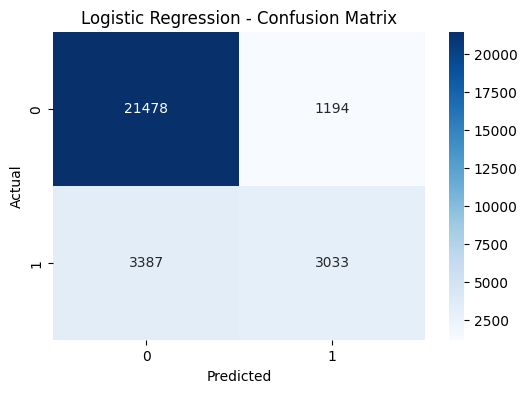



Model: Random Forest
Accuracy: 0.8437714835693662
Precision: 0.7523553162853297
Recall: 0.4353582554517134
F1 Score: 0.5515540207202763
Confusion Matrix:
 [[21752   920]
 [ 3625  2795]]


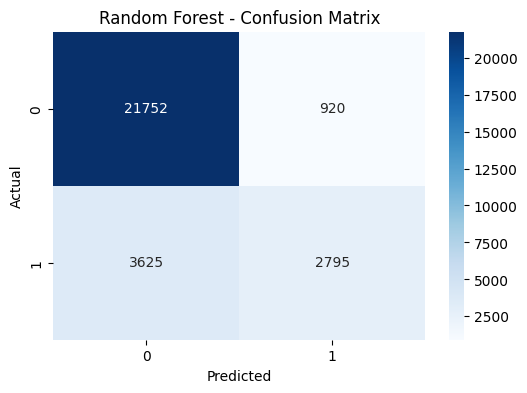



Model: KNN
Accuracy: 0.8293345249553141
Precision: 0.6607734806629835
Recall: 0.4657320872274143
F1 Score: 0.546368204659662
Confusion Matrix:
 [[21137  1535]
 [ 3430  2990]]


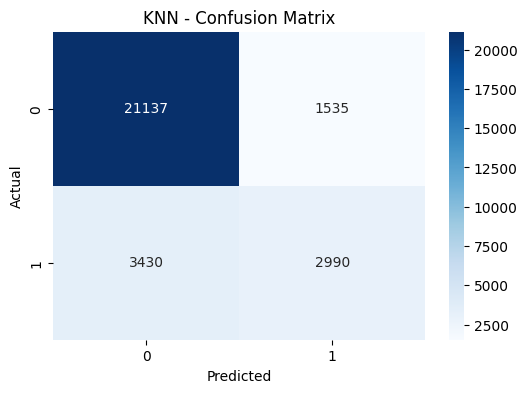



Model: Decision Tree
Accuracy: 0.8327375223429121
Precision: 0.7443396226415094
Recall: 0.3686915887850467
F1 Score: 0.493125
Confusion Matrix:
 [[21859   813]
 [ 4053  2367]]


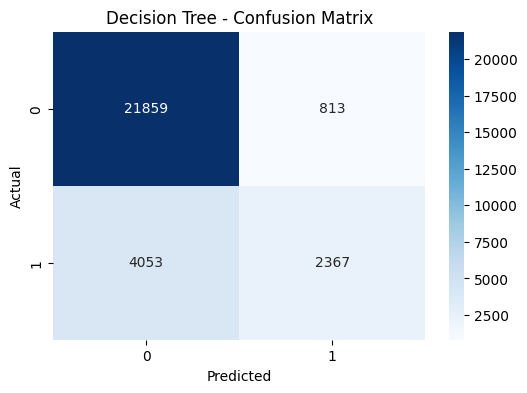



Model: XGBoost
Accuracy: 0.8503368623676613
Precision: 0.7282368537339814
Recall: 0.5133956386292835
F1 Score: 0.6022291247944455
Confusion Matrix:
 [[21442  1230]
 [ 3124  3296]]


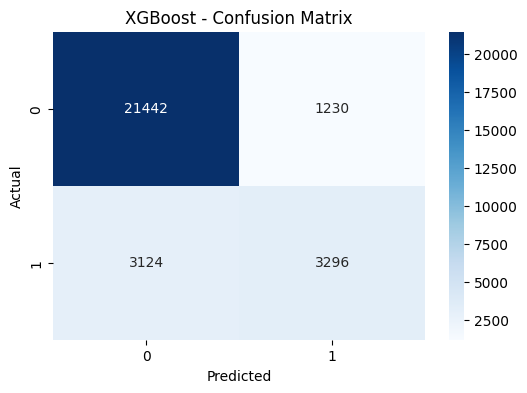



Model: Naive Bayes
Accuracy: 0.8031761308950914
Precision: 0.549543118218161
Recall: 0.5995327102803738
F1 Score: 0.573450536352801
Confusion Matrix:
 [[19517  3155]
 [ 2571  3849]]


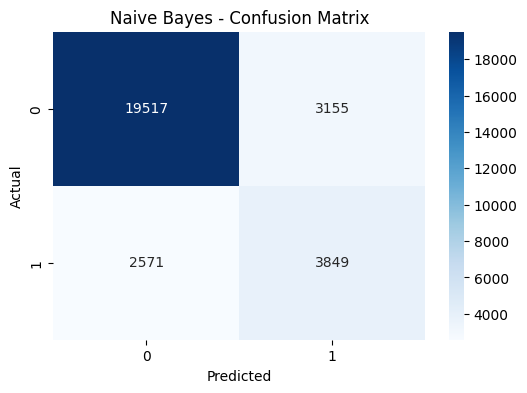



Model: CatBoost
Accuracy: 0.8531211329575141
Precision: 0.7416160252081927
Recall: 0.5132398753894081
F1 Score: 0.6066464144343183
Confusion Matrix:
 [[21524  1148]
 [ 3125  3295]]


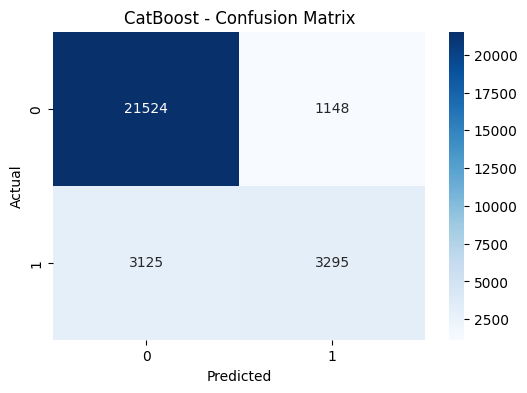

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    print(f"Model: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    # Plot confusion matrix heatmap
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    print("\n")


evaluate_model(log_reg, X_test, y_test, "Logistic Regression")
evaluate_model(RF, X_test, y_test, "Random Forest")
evaluate_model(knn, X_test_scaled, y_test, "KNN")
evaluate_model(dt, X_test_scaled, y_test, "Decision Tree")
evaluate_model(xgb, X_test_scaled, y_test, "XGBoost")
evaluate_model(nb, X_test, y_test, "Naive Bayes")
evaluate_model(cat, X_test, y_test, "CatBoost")


## Metrics

- Accuracy: It is total correct predictions divided by total predictions.
- Precision: Checking the correctness of predictions i.e. if model predicts rainfall on 10 days , but it's actually rained on 6, then precision = 6/10 = 60%.
- Recall: It's about catching all the actual rainy days. e.g. There were 8 rainy days, model correctly predicted 6 of them.
Recall = 6 / 8 = 75%
- F1 Score: A balance between precision and recall.
- Confusion Matrix: Comparing model's predictions to the actual truth.


<div style="background-color:green; color:white; padding:15px 0; text-align:center; font-size:24px;">
  Model Selection
</div>


## Choosing the best model

Choosing the best model depends not only on accuracy score but also on precision, recall, f1 scores and confusion matrix.

Comparing the models above,

**CatBoost classifier** has the highest accuracy score of **85.27%**
- Precision - 74.12%
- Recall - 51.09%
- F1 Score - 60.48%

**Random Forest Classifier** competes with CatBoost Classifier having an accuracy score of **84.37%**
- Precision - 75.23%
- Recall - 43.53%
- F1 Score - 55.15%

While **RandomForest** outperforms **CatBoost** in precision, **CatBoost** is stronger overall with better accuracy, recall and F1 score.

So, the preferable model is **CatBoost Classifier**.
